<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Students/Jim%C3%A9nez_814/Examen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kA_c} \right ) ^2 (T-T_{\infty})=0\\
\frac{d^2\theta}{dx^2} - a^2 \theta=0
\end{equation}

In [16]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint
from scipy.optimize import newton
import sympy as sy

In [17]:
#-------------------------------------------------------------------------
#     Condiciones iniciales
#-------------------------------------------------------------------------

Tinf = 300 #K temperatura extremo
ancho = 0.05 #m
espesor = 0.001 #m
Area = 5e-5 #m² área
p = 0.102 #m perímetro
k = 200 # W/mK conductividad t+ermica
Tb = 313 # K temperatura base
h = 20 #W/m²K Coeficiente de transferencia de calor
n=100
#theta = lambda T: T-Tinf
theta0 = Tb - Tinf
a = (h*p)/(k*Area)
x = np.linspace(0,1,n)
thetaf = 0

In [18]:
a

204.0

Teórica

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}\\
\theta=\theta_0 e^{-x\sqrt a}
\end{equation}

In [19]:
def teorica(x):
  arg = np.sqrt(a)
  T = Tinf+ (Tb-Tinf) * np.exp(-x*arg)
  return T


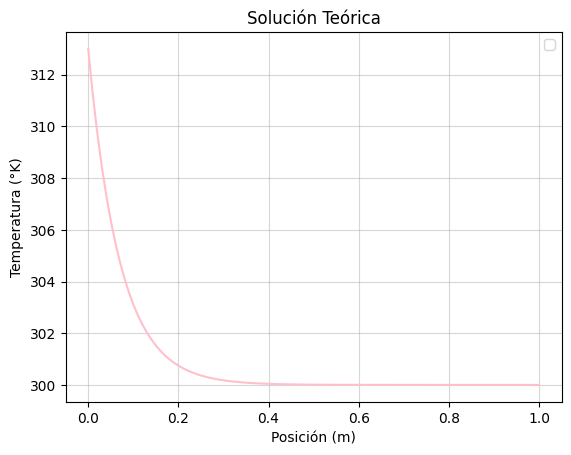

In [20]:
#prueba = lambda x: theta0*np.exp(-x* np.sqrt(a))
plt.figure()
plt.plot(x,teorica(x),c = "pink")
#plt.plot(x,prueba(x))
plt.xlabel("Posición (m)")
plt.ylabel("Temperatura (°K)")
plt.title("Solución Teórica")
#plt.plot(x305,teorica(x305),"o", c = "magenta")
#plt.axhline(305, linestyle = ":", c = "lavenderblush", label = r"305°K")
plt.grid(alpha = 0.5)
plt.legend()
plt.show()


llamaré
$$\omega=\theta'\\
\sigma = \omega' = \theta''$$

$$\frac{d\omega}{dx}=a^2\theta$$

In [21]:
def func(T,x):
  theta, omega = T
  dtdx = [omega, (a**2)*theta]
  return dtdx

In [22]:
#def func0 (T,x):


In [23]:
t0 = [theta0 , theta0*(a**2)]
#condiciones iniciales, para theta y omega
t0

[13, 541008.0]

In [24]:
sol = odeint(func,t0,x)

In [25]:
sol

array([[1.30000000e+01, 5.41008000e+05],
       [1.02930198e+04, 2.16835008e+06],
       [8.21057757e+04, 1.67583130e+07],
       [6.44755350e+05, 1.31531204e+08],
       [5.06181908e+06, 1.03261123e+09],
       [3.97389607e+07, 8.10674800e+09],
       [3.11979719e+08, 6.36438627e+10],
       [2.44926750e+09, 4.99650570e+11],
       [1.92285297e+10, 3.92262006e+12],
       [1.50957931e+11, 3.07954179e+13],
       [1.18512945e+12, 2.41766408e+14],
       [9.30412740e+12, 1.89804199e+15],
       [7.30441611e+13, 1.49010089e+16],
       [5.73449743e+14, 1.16983748e+17],
       [4.50199719e+15, 9.18407427e+17],
       [3.53439494e+16, 7.21016568e+18],
       [2.77475686e+17, 5.66050400e+19],
       [2.17838577e+18, 4.44390697e+20],
       [1.71019112e+19, 3.48878989e+21],
       [1.34262431e+20, 2.73895359e+22],
       [1.05405765e+21, 2.15027760e+23],
       [8.27511847e+21, 1.68812417e+24],
       [6.49656932e+22, 1.32530014e+25],
       [5.10027900e+23, 1.04045692e+26],
       [4.004089

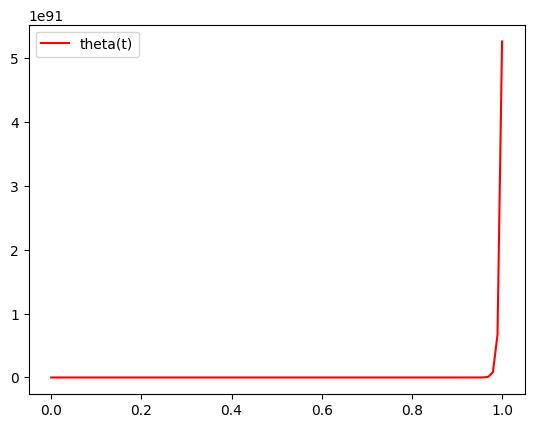

In [26]:
plt.figure()
plt.plot(x, sol[:, 0], color = "red", label='theta(t)')
#plt.plot(x, sol[:, 1], 'g', label='omega(t)')
plt.legend()
plt.show()

Falla porque le falta la condición final, la cual no podemos aregar con odeint. >:c

# 4. Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K

In [28]:
t305 = lambda x: teorica(x)-305
x_ = sy.Symbol("x")

In [29]:
expr = (Tb-Tinf) * sy.exp(-x_*sy.sqrt(a))
dt = sy.lambdify(x_, sy.diff(expr,x_), "numpy")
dt0 = lambda x: -185.677139142114*np.exp(-14.2828568570857*x)

In [30]:
sy.diff(expr,x_)

-185.677139142114*exp(-14.2828568570857*x)

In [31]:
x305 = newton(t305,1 , fprime = dt0)
print(f"Para {x305:.3}m alcanza una temperatura de 305°K")

<ipython-input-19-dff18e010785>:3: RuntimeWarning: overflow encountered in exp
  T = Tinf+ (Tb-Tinf) * np.exp(-x*arg)


RuntimeError: ignored

Profe, esto funcionaba, hasta que reinicie el kernel, me quedé sin tiempo de corregirlo, el valor era $≈0.6$ m

In [ ]:
teorica(x305)
#Comprobando